# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"
#weather_api_key = "weather_api_key"
filters = "city"
limit = 1
bias = "proximity:0,0"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # NEED TO DO THIS 
    city_url = f"{base_url}?q={city}&appid={weather_api_key}&units=imperial"

    print (city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        #pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=harstad&appid=fc6fa590fa5e092e8bbf24e5a04d02ff&units=imperial
Processing Record 1 of Set 1 | harstad
https://api.openweathermap.org/data/2.5/weather?q=nar'yan-mar&appid=fc6fa590fa5e092e8bbf24e5a04d02ff&units=imperial
Processing Record 2 of Set 1 | nar'yan-mar
https://api.openweathermap.org/data/2.5/weather?q=longyearbyen&appid=fc6fa590fa5e092e8bbf24e5a04d02ff&units=imperial
Processing Record 3 of Set 1 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?q=sainte-suzanne&appid=fc6fa590fa5e092e8bbf24e5a04d02ff&units=imperial
Processing Record 4 of Set 1 | sainte-suzanne
https://api.openweathermap.org/data/2.5/weather?q=utrik&appid=fc6fa590fa5e092e8bbf24e5a04d02ff&units=imperial
Processing Record 5 of Set 1 | utrik
https://api.openweathermap.org/data/2.5/weather?q=pemba&appid=fc6fa590fa5e092e8bbf24e5a04d02ff&units=imperial
Processing Record 6 of Set 1 | pemba
https://ap

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,harstad,68.7990,16.5293,21.15,73,66,4.05,NO,1712084750
1,nar'yan-mar,67.6713,53.0870,-3.89,93,5,8.01,RU,1712084751
2,longyearbyen,78.2186,15.6401,-0.56,65,40,4.61,SJ,1712084752
3,sainte-suzanne,-20.9061,55.6089,77.22,88,75,17.27,RE,1712084753
4,utrik,11.2278,169.8474,79.93,77,100,16.40,MH,1712084753


In [14]:
import os

# Create the output directory
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,harstad,68.7990,16.5293,21.15,73,66,4.05,NO,1712084750
1,nar'yan-mar,67.6713,53.0870,-3.89,93,5,8.01,RU,1712084751
2,longyearbyen,78.2186,15.6401,-0.56,65,40,4.61,SJ,1712084752
3,sainte-suzanne,-20.9061,55.6089,77.22,88,75,17.27,RE,1712084753
4,utrik,11.2278,169.8474,79.93,77,100,16.40,MH,1712084753


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

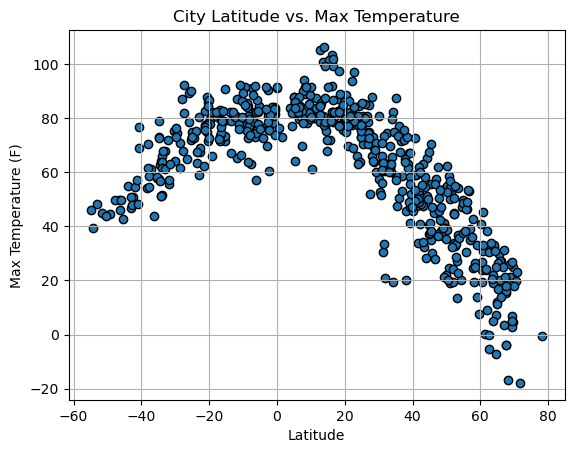

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

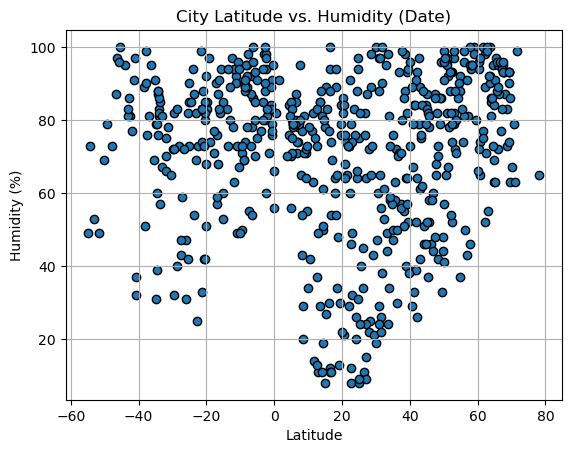

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

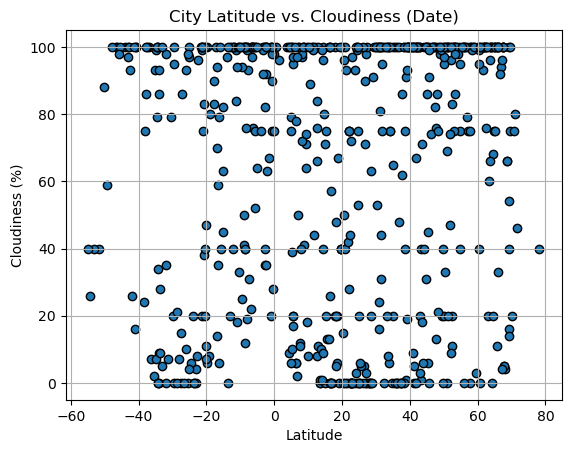

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

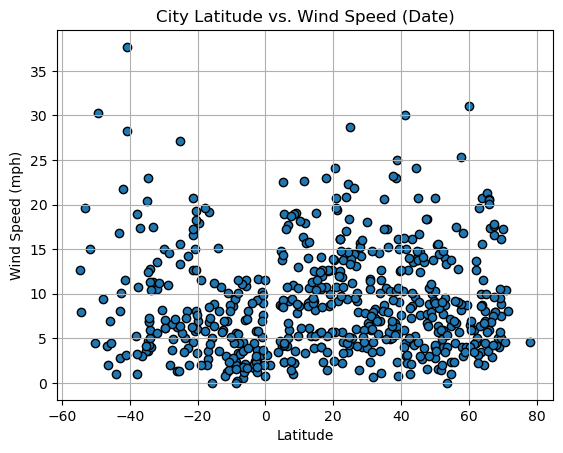

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,harstad,68.7990,16.5293,21.15,73,66,4.05,NO,1712084750
1,nar'yan-mar,67.6713,53.0870,-3.89,93,5,8.01,RU,1712084751
2,longyearbyen,78.2186,15.6401,-0.56,65,40,4.61,SJ,1712084752
4,utrik,11.2278,169.8474,79.93,77,100,16.40,MH,1712084753
6,kodiak,57.7900,-152.4072,24.49,46,0,8.14,US,1712084614


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,sainte-suzanne,-20.9061,55.6089,77.22,88,75,17.27,RE,1712084753
5,pemba,-12.9740,40.5178,81.81,80,100,10.76,MZ,1712084754
7,grytviken,-54.2811,-36.5092,39.49,73,26,7.94,GS,1712084756
9,port-aux-francais,-49.3500,70.2167,44.53,79,59,30.29,TF,1712084758
12,alice springs,-23.7000,133.8833,63.21,54,0,5.01,AU,1712084764


###  Temperature vs. Latitude Linear Regression Plot

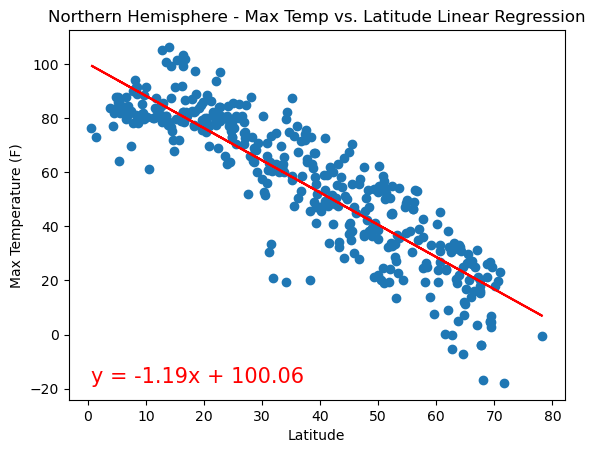

The r-squared value is: 0.7899066822045886


In [26]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Max Temp"])), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")


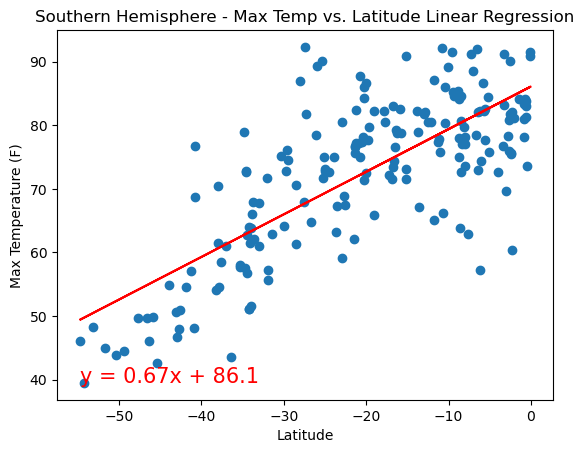

The r-squared value is: 0.5690472754434615


In [28]:
# Linear regression on Southern Hemisphere
# Perform linear regression for Temperature vs. Latitude in the Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Max Temp"])), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")


**Discussion about the linear relationship: 
Plot points in the Northern Hemispher are closer to the regression line where as they are more scattered in the Southern Hemispher. 

### Humidity vs. Latitude Linear Regression Plot

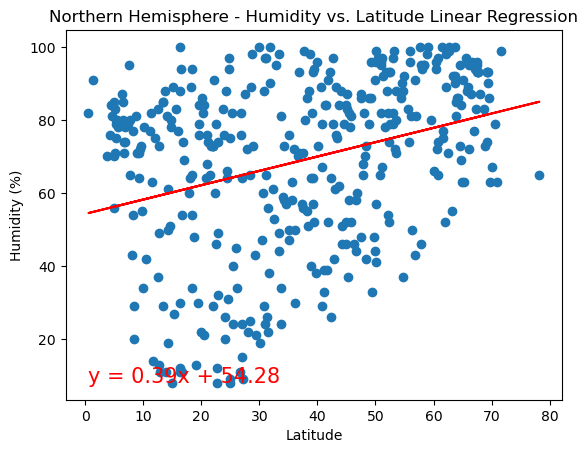

The r-squared value is: 0.10237169361045666


In [31]:
# Northern Hemisphere
# Filter data for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression for Humidity vs. Latitude in the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Humidity"])), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")

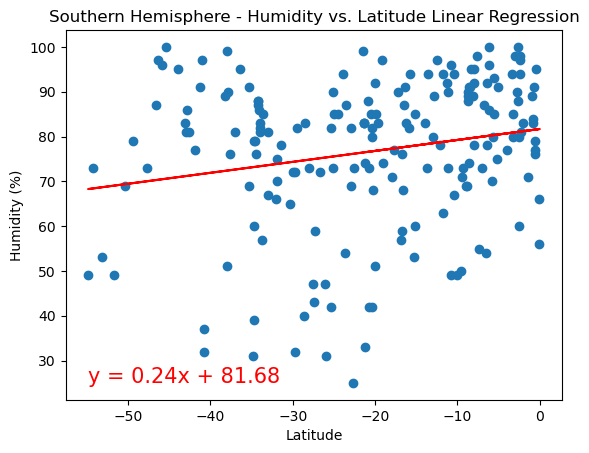

The r-squared value is: 0.04168658719750533


In [33]:
# Southern Hemisphere
# Filter data for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression for Humidity vs. Latitude in the Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Humidity"])), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")

**Discussion about the linear relationship: These show that in the Southern Hemispher there seems to be a correlation between latitude being closer to 0 the higher the humidity.  

### Cloudiness vs. Latitude Linear Regression Plot

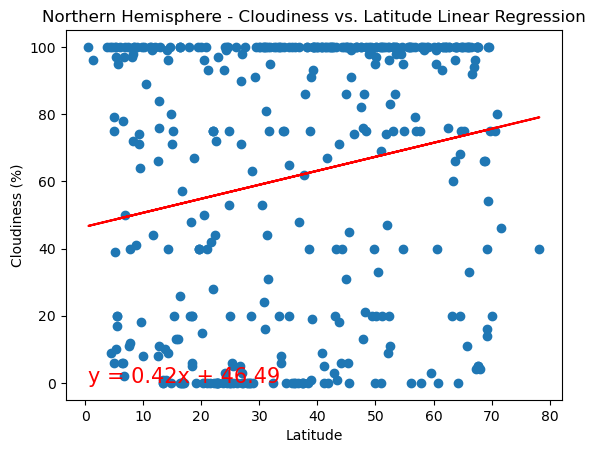

The r-squared value is: 0.04001244091964758


In [35]:
# Northern Hemisphere
# Filter data for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Cloudiness"])), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")


The r-value is: 0.02056735429994368


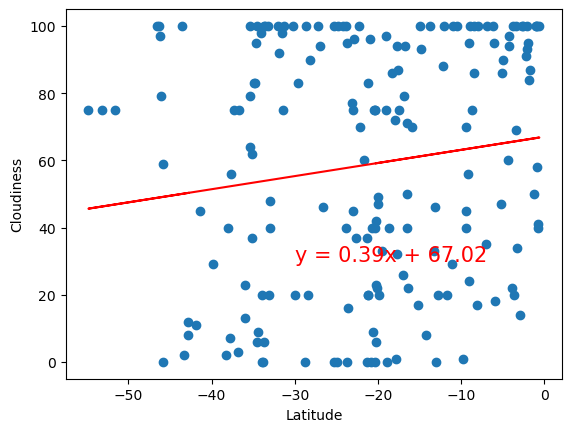

In [20]:
# Southern Hemisphere
# Filter data for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Cloudiness"]), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")

**Discussion about the linear relationship: In both the the Northern and Southern Hemisphere there seems to be a a strong relation to the Latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

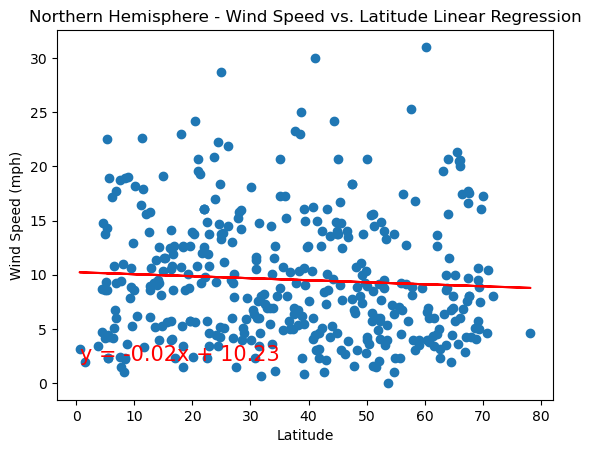

The r-squared value is: 0.003894263078889433


In [37]:
# Northern Hemisphere
# Filter data for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate the regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Wind Speed"]) + 2), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")

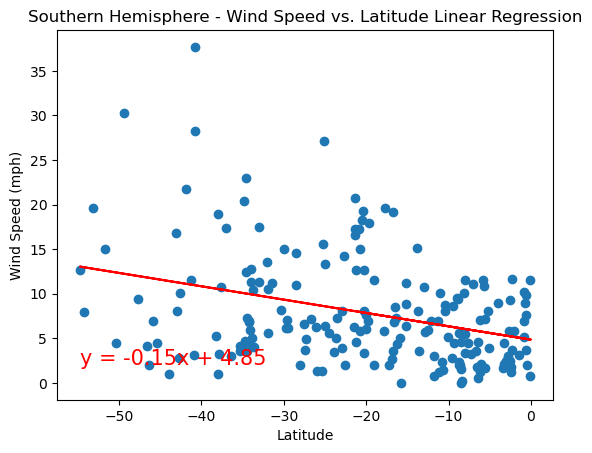

The r-squared value is: 0.11679840802497947


In [39]:
# Southern Hemisphere
# Filter data for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression for Wind Speed vs. Latitude in the Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate the regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot the scatter plot and linear regression line
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Wind Speed"]) + 2), fontsize=15, color="red")

# Show plot
plt.show()

# Display the r-squared value
print(f"The r-squared value is: {rvalue**2}")

**Discussion about the linear relationship: In the Southern Hemispher the closer the Latitude is to - the lower the Windy Speed.